In [1]:
import os

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7

fatal: destination path 'yolov7' already exists and is not an empty directory.


In [2]:
!pip install -qr ./yolov7/requirements.txt

Error fix : [Indices should be either on cpu or on the same device as the indexed tensor](https://stackoverflow.com/questions/74372636/indices-should-be-either-on-cpu-or-on-the-same-device-as-the-indexed-tensor)

In [2]:
SIZE = 640

BATCH_SIZE = 4
EPOCHS = 30
MODEL = "yolov7"
WORKERS = 4
PROJECT = "Face_object_detection"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}"


In [4]:
import torch
torch.cuda.empty_cache()
torch.cuda.is_available()


True

In [6]:
!wandb disabled


'wandb'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
os.getcwd()


'e:\\Workspace\\face object detection'

In [5]:
model = torch.hub.load("./yolov7",
                       'custom',
                       f"./{PROJECT}/{RUN_NAME}/weights/best.pt",
                       source='local',
                       force_reload=True)



                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  8                -1  1     36992  

Adding autoShape... 


In [7]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


def get_prediction(img_path):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

    results = model(img, size=640)
    result_pd = results.pandas().xyxy[0]

    for i in range(len(result_pd)):
        xmin, ymin = int(result_pd['xmin'][i]), int(result_pd['ymin'][i])
        xmax, ymax = int(result_pd['xmax'][i]), int(result_pd['ymax'][i])
        confidence = result_pd['confidence'][i]
        name = result_pd['name'][i]
        img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (36, 255, 12), 1)
        cv2.putText(img, f"{name} : {confidence:0.2f}", (xmin, ymin-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    plt.imshow(img)
    plt.show()
    return result_pd


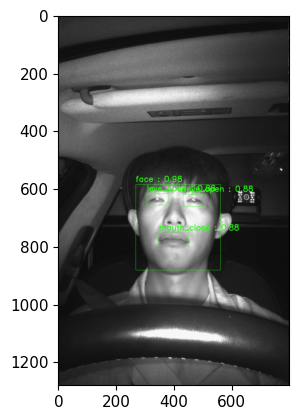

,xmin,ymin,xmax,ymax,confidence,class,name
0,269.50,586.5,562.50,882.5,0.977051,0,face
1,307.75,618.0,381.25,657.0,0.884277,2,leye_open
2,349.50,754.5,452.50,797.5,0.882812,5,mouth_close
3,433.25,620.5,511.50,662.5,0.880371,4,reye_open


In [ ]:
img_path = 'preprocessed_dataset/val/images/045_G1_01____20200929_110850_00068.jpg'

get_prediction(img_path=img_path)

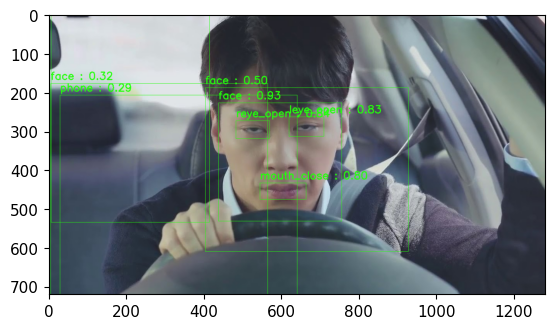

,xmin,ymin,xmax,ymax,confidence,class,name
0,437.0,228.75,755.0,532.00,0.925781,0,face
1,482.5,274.25,569.5,320.75,0.835449,4,reye_open
2,619.0,264.50,709.0,314.00,0.832031,2,leye_open
3,544.5,434.50,663.5,476.50,0.799316,5,mouth_close
4,5.5,0.00,414.0,535.50,0.671387,0,face
5,403.0,189.50,927.0,610.50,0.499023,0,face
6,4.0,178.50,564.5,720.00,0.318359,0,face
7,28.0,208.25,640.0,720.00,0.294434,8,phone


In [8]:
get_prediction("test_image/image1.jpg")

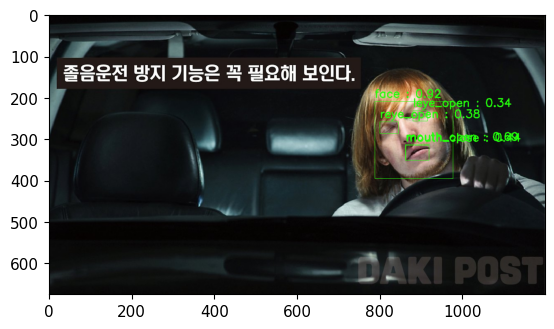

,xmin,ymin,xmax,ymax,confidence,class,name
0,788.437439,209.296860,977.812439,395.390594,0.918945,0,face
1,862.968689,313.593719,919.218689,351.093719,0.692383,6,mouth_open
2,863.437439,315.468719,919.687439,351.093719,0.437988,5,mouth_close
3,800.156189,258.515594,845.156189,286.171844,0.380859,4,reye_open
4,880.312439,231.093735,915.937439,256.406219,0.337402,2,leye_open


In [ ]:
get_prediction("test_image/image2.jpg")


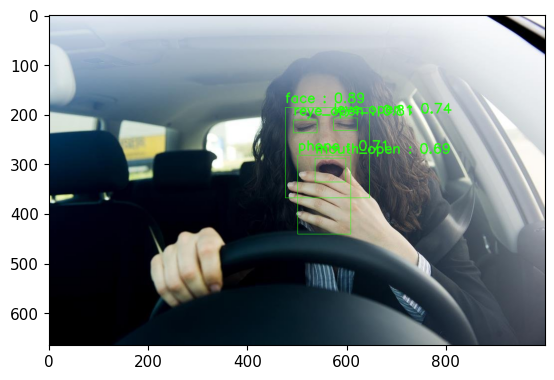

,xmin,ymin,xmax,ymax,confidence,class,name
0,476.562500,186.015625,646.875000,368.828125,0.889160,0,face
1,492.187500,211.796875,540.625000,237.578125,0.805176,4,reye_open
2,573.437500,207.890625,621.093750,232.500000,0.737305,2,leye_open
3,501.171875,282.109375,608.984375,441.874969,0.707520,8,phone
4,536.328125,288.359375,598.046875,336.015625,0.693359,6,mouth_open


In [ ]:
get_prediction("test_image/image3.jpg")


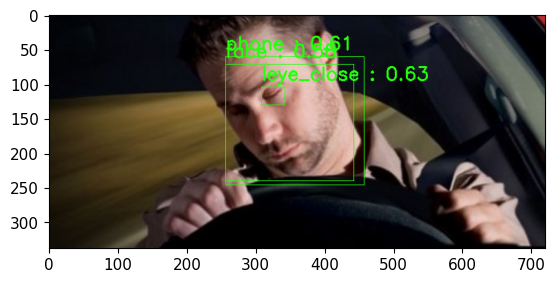

,xmin,ymin,xmax,ymax,confidence,class,name
0,308.250000,104.382812,342.0000,130.117188,0.634277,1,leye_close
1,256.921875,60.789062,457.8750,246.343750,0.612793,8,phone
2,256.640625,71.898438,442.6875,240.718750,0.581543,0,face


In [ ]:
get_prediction("test_image/image2.png")


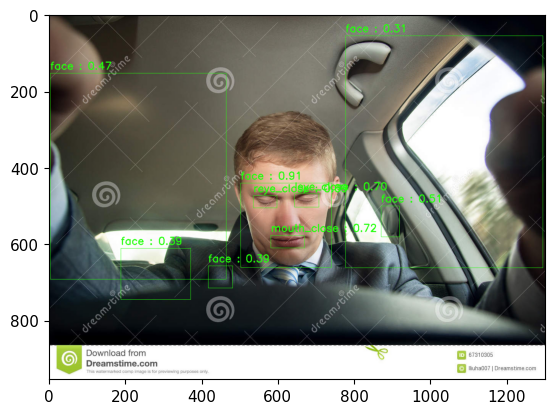

,xmin,ymin,xmax,ymax,confidence,class,name
0,502.734375,440.437500,740.390625,661.843750,0.909668,0,face
1,581.953125,577.546875,669.296875,610.046875,0.720215,5,mouth_close
2,643.906250,468.875000,707.890625,503.406250,0.697266,1,leye_close
3,535.742188,473.191406,597.695312,505.691406,0.693848,3,reye_close
4,870.390625,500.613281,918.125000,581.609375,0.506348,0,face
5,3.046875,152.761719,464.648438,692.312500,0.473389,0,face
6,417.929688,657.273438,481.914062,715.164062,0.385986,0,face
7,188.398438,611.570312,371.210938,745.632812,0.385498,0,face
8,777.968750,54.753906,1294.921875,662.859375,0.311768,0,face


In [ ]:
get_prediction("test_image/image4.jpg")


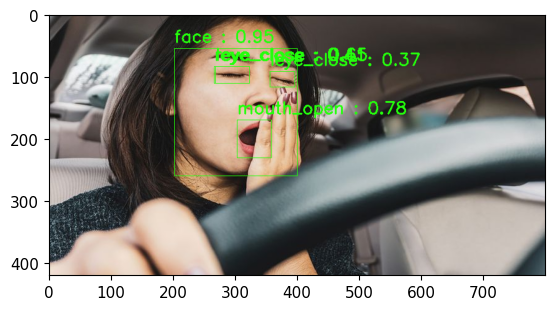

,xmin,ymin,xmax,ymax,confidence,class,name
0,202.1875,55.234375,400.9375,260.312500,0.954102,0,face
1,303.7500,170.468750,358.1250,231.406250,0.776367,6,mouth_open
2,266.5625,84.140625,323.1250,111.171875,0.653809,3,reye_close
3,268.1250,84.062500,323.7500,111.093750,0.406006,1,leye_close
4,356.2500,92.890625,396.2500,117.421875,0.365723,1,leye_close


In [6]:
get_prediction("test_image/image5.jpg")


In [ ]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/image1.jpg

In [8]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/image5.jpg

Namespace(weights=['Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt'], source='./test_image/image5.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 face, 2 leye_closes, 1 reye_close, 1 mouth_open, Done. (12.0ms) Inference, (4.0ms) NMS
 The image with the result is saved in: runs\detect\exp8\image5.jpg
Done. (0.167s)


YOLOR  v0.1-115-g072f76c torch 1.13.0 CUDA:0 (NVIDIA GeForce RTX 2080, 8191.5625MB)

c:\Users\pokem\anaconda3\envs\yolo_v5\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients, 103.3 GFLOPS


In [ ]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/video1.mp4

In [ ]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/video2.mp4 --img-size 640

In [ ]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/video4.mp4 --img-size 640

In [2]:
!python ./yolov7/detect.py --weights Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt --source ./test_image/video5.mp4 --img-size 640

Namespace(weights=['Face_object_detection/yolov7_size640_epochs30_batch4/weights/best.pt'], source='./test_image/video5.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/164) e:\Workspace\face_object_detection\test_image\video5.mp4: 2 faces, 1 leye_open, 1 reye_open, 1 mouth_close, Done. (11.0ms) Inference, (31.1ms) NMS
video 1/1 (2/164) e:\Workspace\face_object_detection\test_image\video5.mp4: 2 faces, 1 leye_open, 1 reye_open, 1 mouth_close, Done. (11.0ms) Inference, (1.0ms) NMS
video 1/1 (3/164) e:\Workspace\face_object_detection\test_image\video5.mp4: 2 faces, 1 leye_open, 1 reye_open, 1 

YOLOR  v0.1-115-g072f76c torch 1.9.1+cu111 CUDA:0 (NVIDIA GeForce RTX 2080, 8191.5625MB)

Model Summary: 306 layers, 36523006 parameters, 6194944 gradients, 103.3 GFLOPS
